# Module-36 Review: Exploring Time Series Data

In [1]:
import numpy as np
import pandas as pd 
import  pandas.tseries
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [2]:
# Load the 'co2' dataset from sm.datasets
data_set = sm.datasets.co2.load()

# load in the data_set into pandas dataframe
CO2 = pd.DataFrame(data=data_set['data'])
CO2.rename(columns={'index': 'date'}, inplace=True)

# set index to date column
CO2.set_index('date', inplace=True)

CO2.head()

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [3]:
CO2.index.value_counts()

2000-05-13    1
1987-01-17    1
1959-06-06    1
1985-03-23    1
1977-03-26    1
             ..
1987-11-21    1
1962-02-03    1
1970-01-31    1
1978-01-28    1
1974-07-27    1
Name: date, Length: 2284, dtype: int64

## Exploring Time Series Data

### Resampling Methods: Downsampling & Upsampling

Downsampling compresses the data into fewer 'bins' and larger ranges (e.g. 52 weeks downsamples to 12 months).  

Upsampling approximates the data into more 'bins' and smaller ranges (e.g. 1 day upsamples to 1,440 minutes)

In [4]:
# Group the time series into monthly buckets
CO2_monthly = CO2['co2'].resample('MS')

# Take the mean of each group 
CO2_monthly_mean = CO2_monthly.mean()

# Display the first 10 elements of resulting time series
CO2_monthly_mean.head(10)

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01           NaN
1958-11-01    313.425000
1958-12-01    314.700000
Freq: MS, Name: co2, dtype: float64

In [5]:
# Retrieve the data between 1st Jan 1990 to 1st Jan 1991
CO2_monthly_mean['1990-01-01':'1991-01-01']

date
1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
Freq: MS, Name: co2, dtype: float64

In [6]:
CO2_monthly_mean.isna().sum()

5

In [7]:
# Perform backward filling of missing values
CO2_final = CO2_monthly_mean.bfill()

# Find the total number of missing values in the time series
CO2_final.isna().sum()

0

In [8]:
CO2_final.index.value_counts()

1995-01-01    1
1972-04-01    1
1963-10-01    1
1983-07-01    1
1993-03-01    1
             ..
1958-07-01    1
1961-08-01    1
1981-05-01    1
1992-12-01    1
1970-01-01    1
Name: date, Length: 526, dtype: int64

## Visualizing Time Series Data

In [9]:
temp_data = pd.read_csv('../visualizing-time-series-data/min_temp.csv')
temp_data['Date'] = pd.to_datetime(temp_data['Date'], format='%d/%m/%y')
temp_data.set_index('Date', inplace=True)

### Line Plots

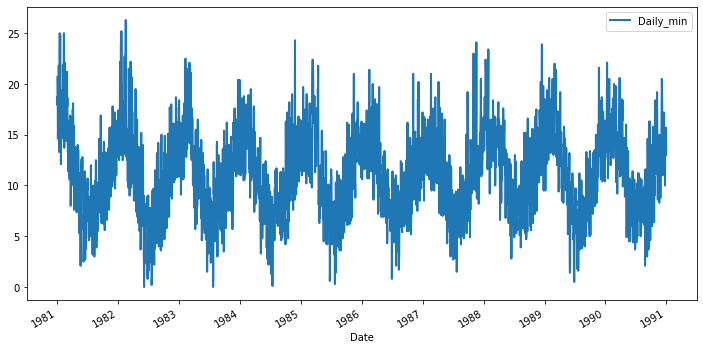

In [10]:
temp_data.plot(figsize=(12,6), linewidth=2, fontsize=10);

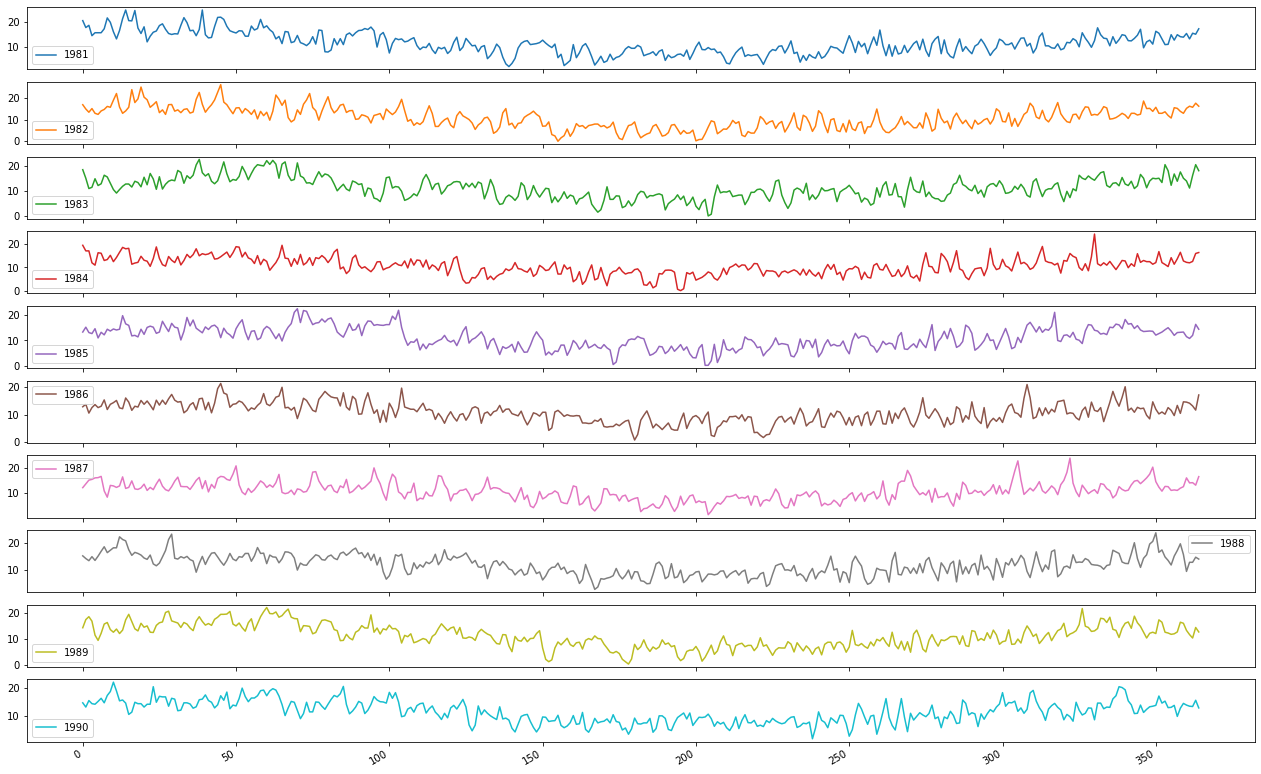

In [11]:
# Use pandas grouper to group values using annual frequency
year_groups = temp_data.groupby(pd.Grouper(freq ='A'))

# Create a new DataFrame and store yearly values in columns  
temp_annual = pd.DataFrame() 

for yr, group in year_groups:
    temp_annual[yr.year] = group.values.ravel()

# Plot the yearly groups as subplots
temp_annual.plot(figsize = (22,15), subplots=True, legend=True)
plt.show()

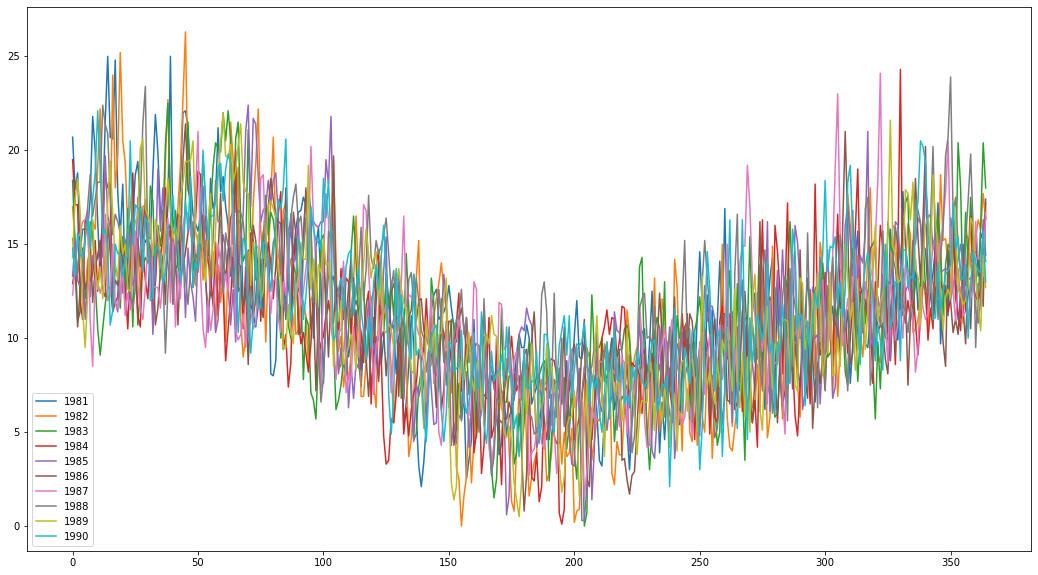

In [12]:
temp_annual.plot(figsize = (18,10), subplots=False, legend=True);

### Dot Plots

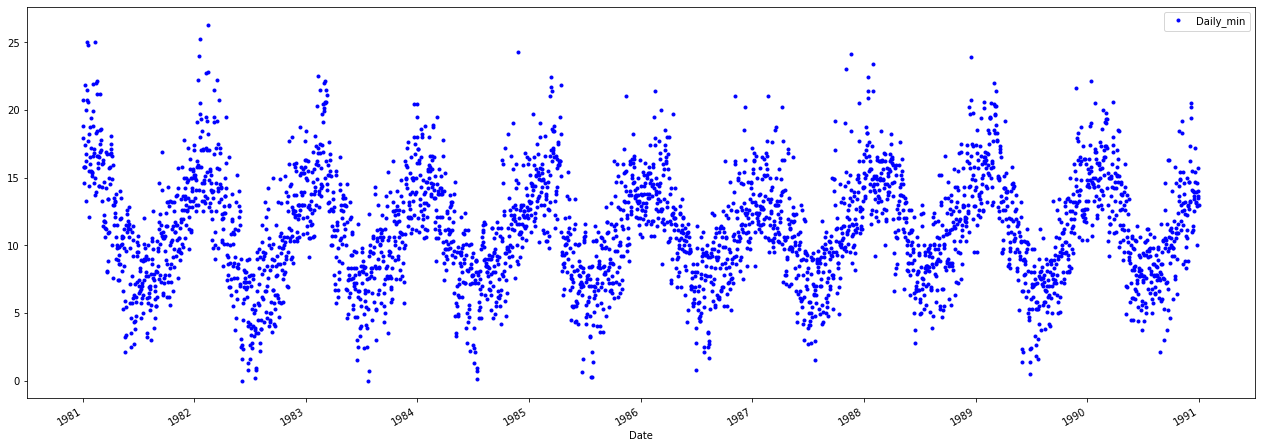

In [13]:
temp_data.plot(figsize = (22,8), style = 'b.');

### Histograms and Density plots

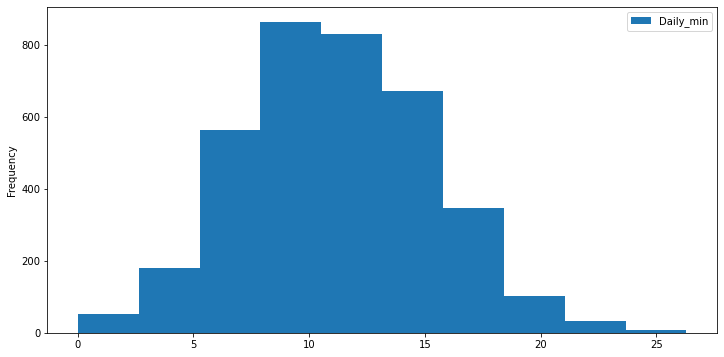

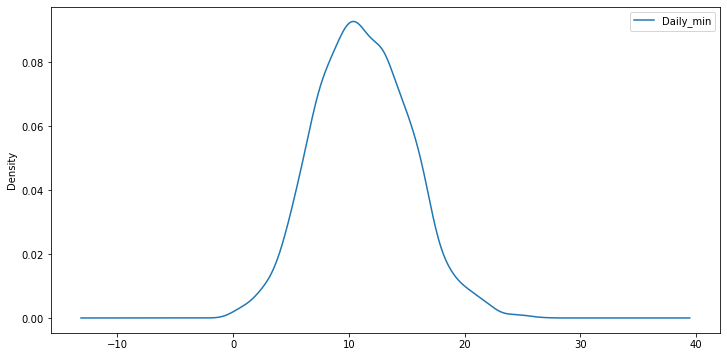

In [14]:
temp_data.plot(kind='hist',figsize = (12,6))
temp_data.plot(kind='kde', figsize = (12,6))
plt.show()

### Box and Whisker 

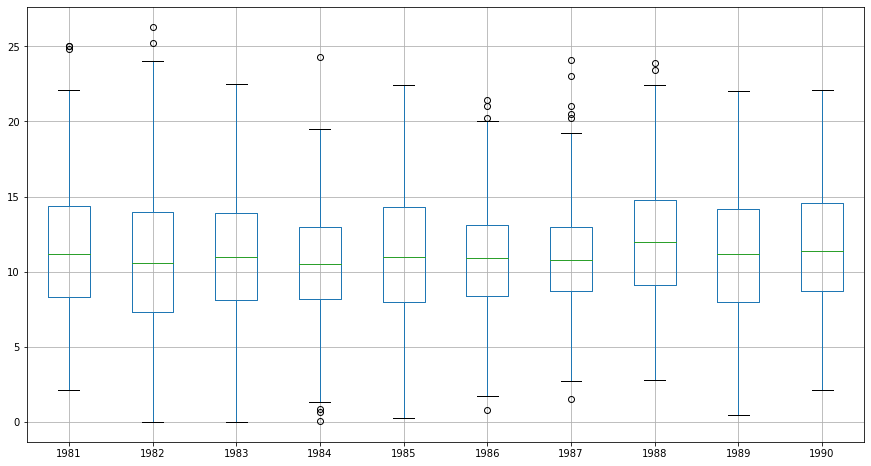

In [15]:
temp_annual.boxplot(figsize = (15,8));

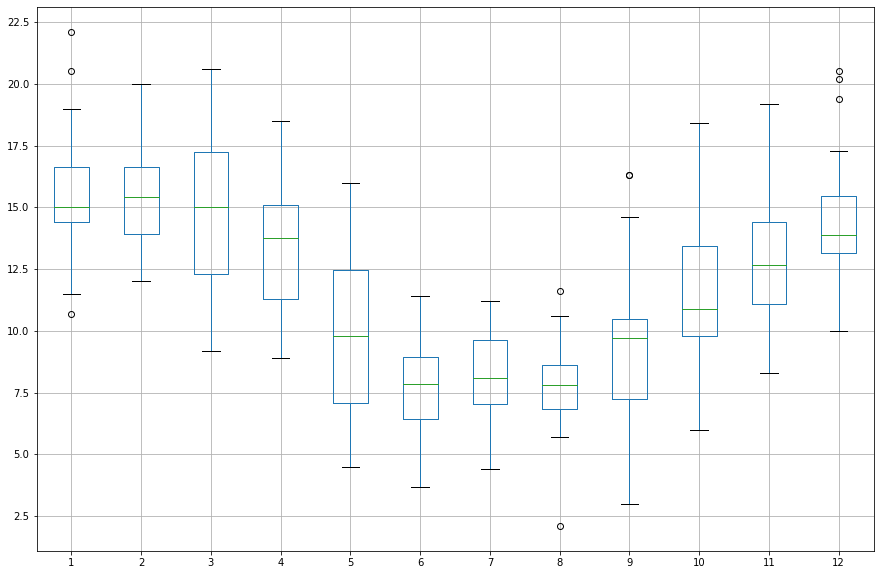

In [16]:
# Use temp_data to extract values for 1990
yr_1990 = temp_data['1990']

# Group observations by month
groups_monthly = yr_1990.groupby(pd.Grouper(freq ='M'))

# Add each month to DataFrame as a column
months_1990 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)
months_df = pd.DataFrame(months_1990)

# Set the column names for each month i.e. 1,2,3, .., 12
months_df.columns = range(1,13)

# Plot the box and whiskers plot for each month 
months_df.boxplot(figsize = (15,10))
plt.show()

### Heatmaps

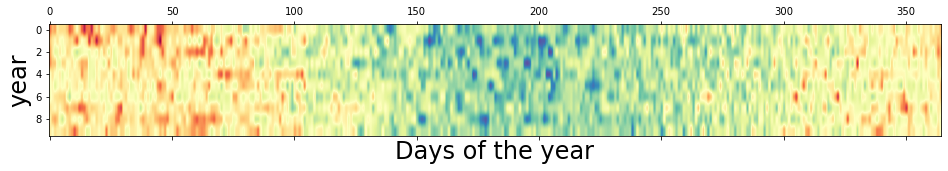

In [17]:
# Transpose the yearly group DataFrame
year_matrix = temp_annual.T

# Draw a heatmap with matshow()
plt.matshow( year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.xlabel("Days of the year",fontsize='24')
plt.ylabel("year",fontsize='24')
plt.show()

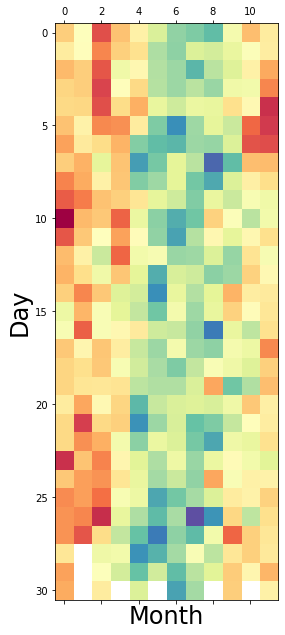

In [18]:
# Draw a heatmap comparing the months of the year in 1990 
plt.matshow(months_df, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.xlabel("Month",fontsize='24')
plt.ylabel("Day",fontsize='24')
plt.show()

## Detecting and Defining Trends

Types of trends: Linear, exponential, Periodic, increasing or decreasing variance

In [19]:
# Import 'passengers.csv'
trend_data = pd.read_csv('../testing-for-trends/passengers.csv')
# Change the type of 'Month' to datetime
trend_data['Month'] = pd.to_datetime(trend_data['Month'])
# Set 'Month' as the index
trend_data.set_index('Month',inplace=True)

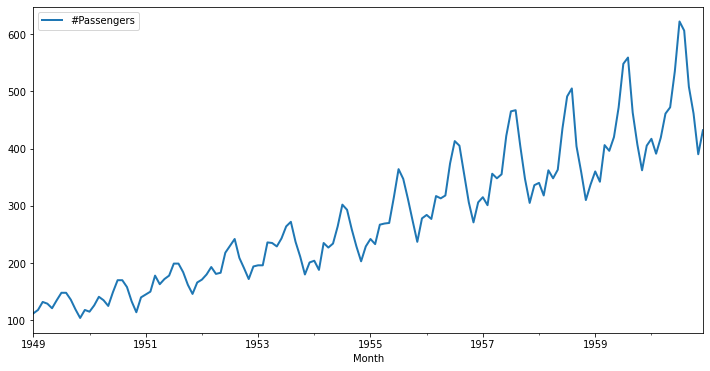

In [20]:
trend_data.plot(figsize=(12,6), linewidth=2, fontsize=10);

#### Testing with Rolling Statistics

In [21]:
# Determine rolling statistics
roll_mean = trend_data.rolling(window=12, center=False).mean()
roll_std = trend_data.rolling(window=12, center=False).std()

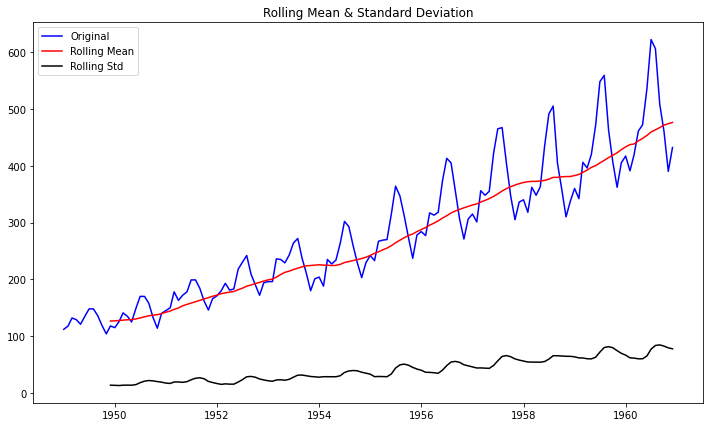

In [22]:
# Plot rolling statistics
fig = plt.figure(figsize=(12,7))
plt.plot(trend_data, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Although standard deviation remains more or less constant, the mean is consistently increasing which indicates that this data set is not ***stationary***

#### Testing Trends with the Dickey-Fuller Test

In [23]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(trend_data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(0.8153688792060433, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [24]:
print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## How and Why to Remove Trends

From [Wikipedia](https://en.wikipedia.org/wiki/Stationary_process): In mathematics and statistics, a stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. ***Consequently, parameters such as mean and variance also do not change over time.***

Because most modeling techniques make the assumption that each observation is independent from the rest (i.e. disjoint conditionality), it is necessary to remove trends from time series data while retaining the information held within it, because a trend is by definition when the joint probability distribution *does* change which violates the afformentioned assumption.  

trend reduction techniques:  log-transform, subtracting the rolling mean, and differencing

In [25]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs

def stationarity_check(data:pd.DataFrame):
    # rolling stats
    roll_mean = data.rolling(window=8, center=False).mean()
    roll_std = data.rolling(window=8, center=False).std()

    # DH test
    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    # plot rolling stats
    fig = plt.figure(figsize=(12,7))
    plt.plot(data, color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # print DH test output 
    print('Results of Dickey-Fuller test: \n')
    print(dfoutput)

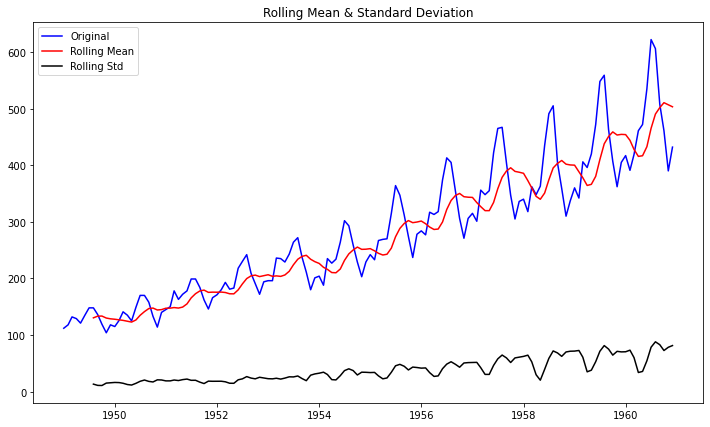

Results of Dickey-Fuller test: 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [26]:
stationarity_check(trend_data)

#### log transformation

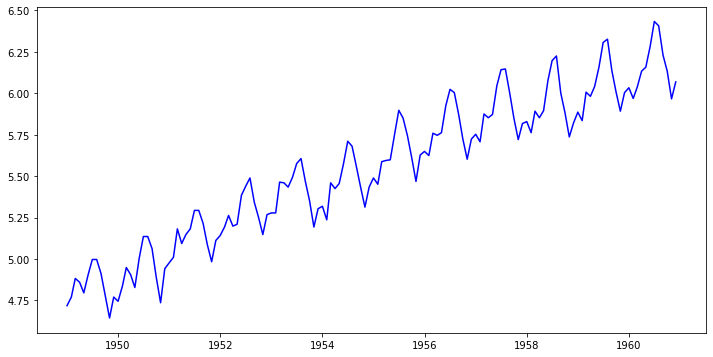

In [27]:
# Plot a log transform
ts_log = np.log(trend_data)
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');

#### Square Root

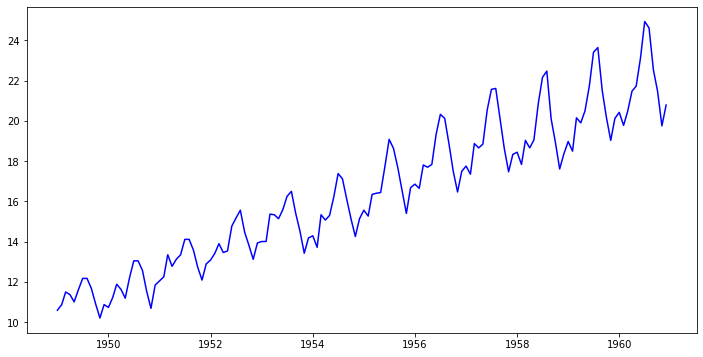

In [28]:
ts_sqrt = np.sqrt(trend_data)
fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='blue');

#### Subtracting the Rolling Mean

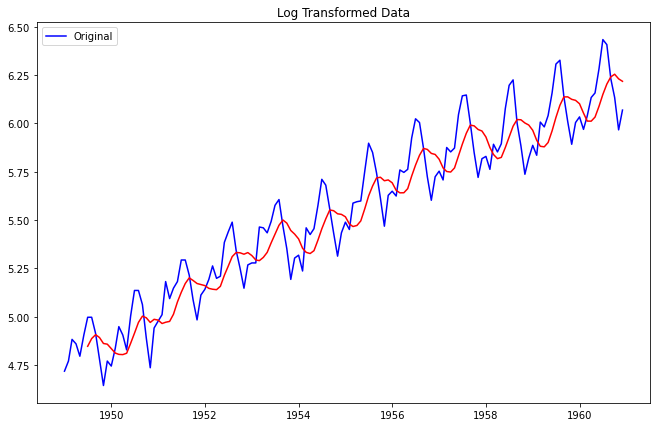

In [29]:
roll_mean = np.log(trend_data).rolling(window=7).mean()

fig = plt.figure(figsize=(11,7)); 
plt.plot(np.log(trend_data), color='blue', label='Original')
plt.plot(roll_mean, color='red');

plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

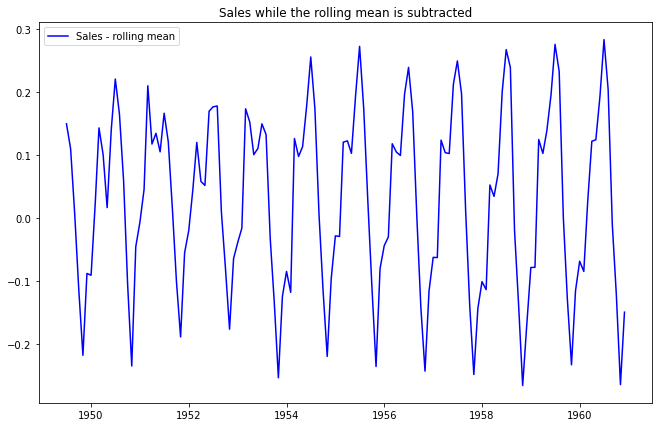

In [30]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean = np.log(trend_data) - roll_mean

# Drop the missing values
data_minus_roll_mean.dropna(inplace=True)

# Plot the result
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

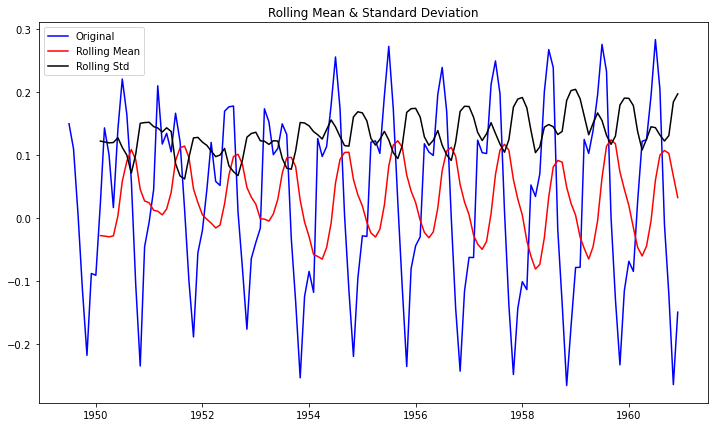

Results of Dickey-Fuller test: 

Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [31]:
stationarity_check(data_minus_roll_mean)

The time series is not stationary because the p-value is still substantial. However this is much better than the raw data set 

#### Subtracting the weighted rolling mean
A moving average based on the mean value in each window. exponentially-weighted moving average (EWMA): A moving average based on a weighted mean that gives the highest weight to the most recent values, and exponentially decreasing weights to earlier values.

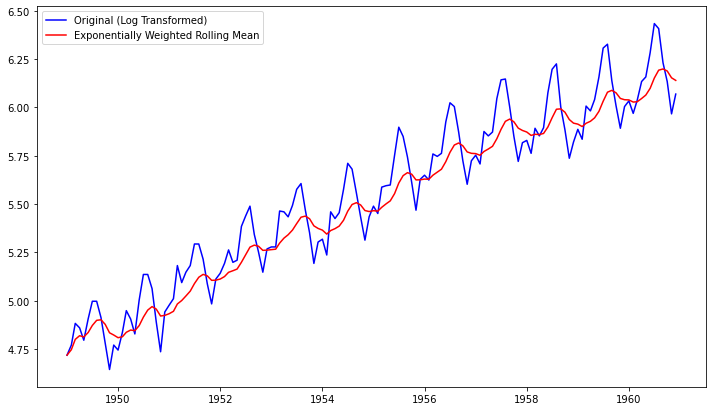

In [32]:
# Calculate Weighted Moving Average of log transformed data
exp_roll_mean = np.log(trend_data).ewm(halflife=4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(trend_data), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)

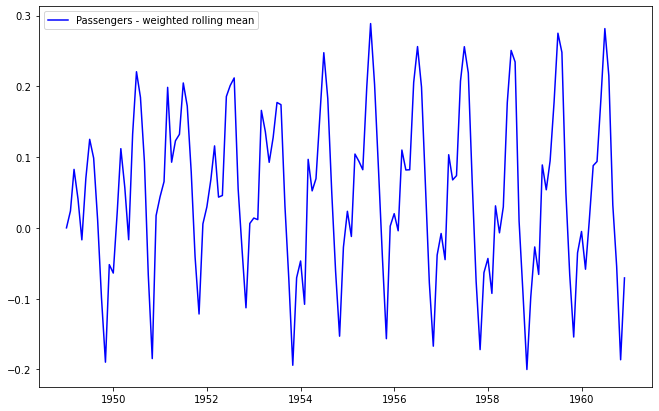

In [33]:
# Subtract the exponential weighted rolling mean from the original data 
data_minus_exp_roll_mean = np.log(trend_data) - exp_roll_mean

# Plot the time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='Passengers - weighted rolling mean')
plt.legend(loc='best')
plt.show(block=False)

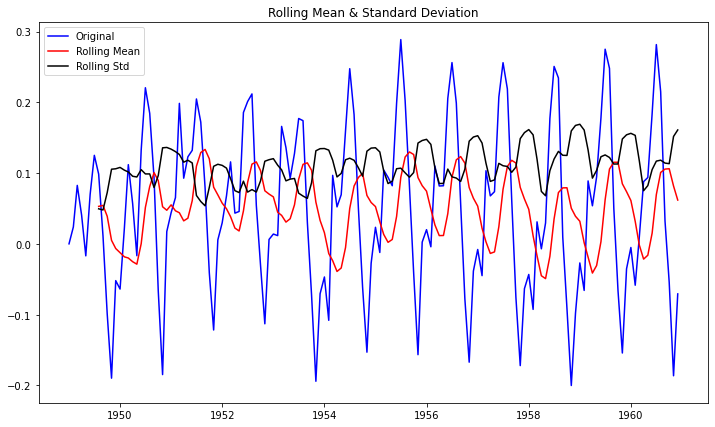

Results of Dickey-Fuller test: 

Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [34]:
# Do a stationarity check
stationarity_check(data_minus_exp_roll_mean)

The data is now stationary because the p-value is less than 0.05

#### Differencing to Remove Seasonality  
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of an observation at a particular time instant with that at the previous instant (i.e. a so-called 1-period "lag").

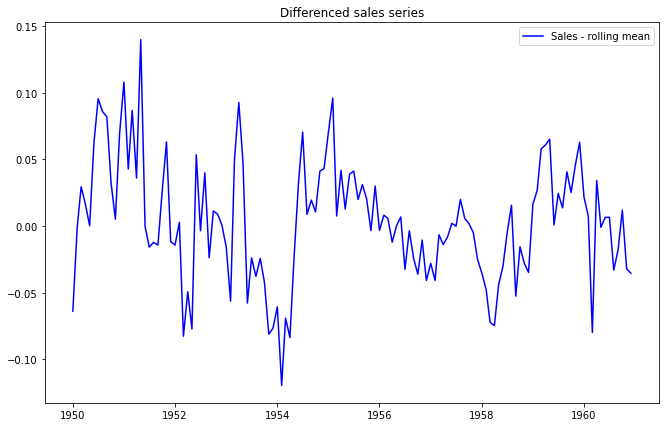

In [35]:
# Difference your data
data_diff = data_minus_exp_roll_mean.diff(periods=12)

# Drop the missing values
data_diff.dropna(inplace=True)

# Plot your differenced time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

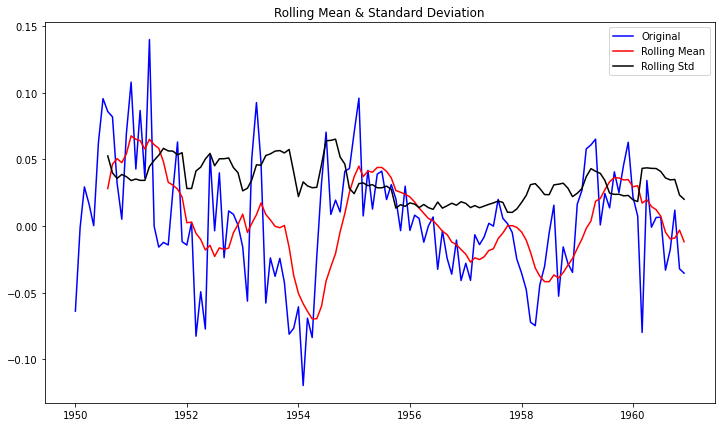

Results of Dickey-Fuller test: 

Test Statistic                  -3.601666
p-value                          0.005729
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [36]:
# Perform the stationarity check
stationarity_check(data_diff)

## Time Series Decomposition

Time series decomposition is a mathematical procedure that transforms a time series into multiple different time series. The original time series is often split into three component series:

- **Seasonal**: Patterns that repeat within a fixed period. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.  

- **Trend**: The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.  

- **Random**: Also called "noise", "irregular", or "remainder", this is the residual of the original time series after the seasonal and trend series are removed.  

i.e. seasonality, trend, random. 

Additive or Multiplicative Decomposition?  
To achieve successful decomposition, it is important to choose between the additive and multiplicative models, which requires analyzing the series. For example, does the magnitude of the seasonality increase when the time series increases?

![img](./images/seasonality_type.png)

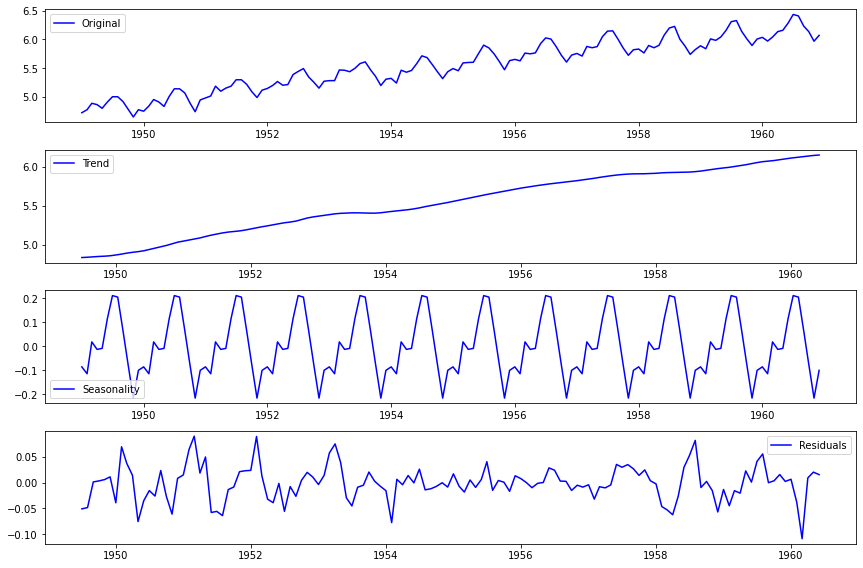

In [37]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(trend_data))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(trend_data), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

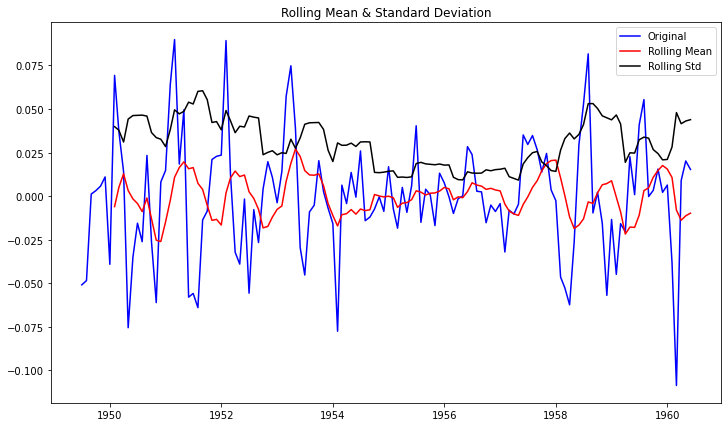

Results of Dickey-Fuller test: 

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [38]:
# Drop missing values from residuals 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

## Recap

- Line plots and dot plots can be useful for getting a sense of how a time series dataset changes over time

- Histograms and density plots can be useful for getting a sense of the time-independent distribution of a time series  

- Box and whisker plots per year (or other seasonality period - day, week, month, etc) can be a great way to easily see trends in the distribution of time series data over time  

- Heat maps can also be useful for comparing changes of time series data across a couple of dimensions. For example, with months on one axis and years on another, they can be a great way to see both seasonality and year on year trends  

- A time series is said to be stationary if its statistical properties such as mean and variance remain constant over time  

- Most time series models work on the assumption that the time series are stationary (assumption of homoscedasticity)  

- Many time series datasets do have trends, violating the assumption of homoscedasticity  

- Common examples are trends that include linear (straight line over time), exponential, and periodic. Some datasets also have increasing (or decreasing) variance over time  

- Any given dataset may exhibit multiple trends (e.g. linear, periodic, and reduction of variance)  

- Rolling statistics can be used to test for trends to see whether the centrality and/or dispersion of time series changes over time  
- The Dickey-Fuller test is a common test for determining whether a time series contains trends  

- Common approaches for removing trends and seasonality include taking a log-transform, subtracting the rolling mean, and differencing 
 
- Decomposing allows you to separately view seasonality (which could be daily, weekly, annual, etc), trend, and random, which is the variability in time series after removing the effects of the seasonality and trend  